In [87]:
# import
from arm import BernoulliArm
from greedy import Greedy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
def mean_cumulative_reward(df_list):
    """累積報酬の平均を算出する
    
    :param df_list: DataFrameのリスト
    :return reward
    """
    return sum([df["reward"].sum() for df in df_list])

In [50]:
def hit_rate(df_list):
    """各時刻の当たり率を時系列リストにして返す
    
    :param df_list: DataFrameのリスト
    :return hit_rate_list: list of hit rate (float, 0~1)
    """
    return list(sum([df["reward"] for df in df_list])/len(df_list))

In [65]:
def best_arm_rate(df_list,best_arm):
    """各時刻の最適アーム選択率を時系列リストにして返す
    
    :param df_list: DataFrameのリスト
    :param best_arm: (int) 最適なアームのインデックス(最適なアームとは報酬の期待値が最大のアーム)
    :return best_arm_rate_list: list of best arm rate (float, 0~1)
    """
    for df in df_list:
        df["is_best"]=df["arm"].apply(lambda x: 1 if x==best_arm  else 0)
    return list(sum([df["is_best"] for df in df_list])/len(df_list))

In [66]:
def simulate(alg,outer_iter):
    """Simulate algrithm.
    
    :param alg: algorithm for bandit problem
    :param outer_iter: the number of Monte Carlo method simulation
    :return hit_rate, best_arm_rate, cumulative_reward
    """
    df_list=[]
    for i in range(outer_iter):
            df=alg.execute()
            df_list.append(df)
    
    mu_list=[alg.arms[i].mu for i in range(alg.K)]
    best_arm=mu_list.index(max(mu_list))
    return hit_rate(df_list),best_arm_rate(df_list,best_arm),mean_cumulative_reward(df_list)

In [91]:
def plot_rate(rate_list,N,algos,title):
    """Plot each rate("Best Arm Rate" or "Hit Rate").
    
    :param rate_list: list of rate(float)
    :param N:the number of trials(int)
    :param algos: list of name of algorithm
    :param title: str.  Expect "Best Arm Rate" or "Hit Rate"
    """
    x = np.arange(N)
    plt.title(title)
    for i in range(len(rate_list)):
        plt.plot(x, rate_list[i], label=algos[i])
    plt.xlabel("trial")
    plt.ylabel("rate")
    plt.legend()
    plt.show()
    plt.close()
    return

In [ ]:
def plot_cumulative_reward(rewards,algos):
    """Plot mean cumulative rewards of each algorithm.
    
    :param rewards: list of reward (int)
    :param algos: list of algorithm name (str)
    """
    x = np.array(algos)
    y= np.array(rewards)
    plt.bar(x,y)
    plt.close()
    return

In [93]:
# set parameters
mus = [0.1, 0.6, 0.8, 0.2]
arms = [BernoulliArm(mu) for mu in mus]
N=100
outer_iter=10

In [94]:
# create algorithm instance
alg = Greedy(arms,N)
print(alg)

<Greedy> N=100 Arms=[BernoulliArm(0.1), BernoulliArm(0.6), BernoulliArm(0.8), BernoulliArm(0.2)]


603


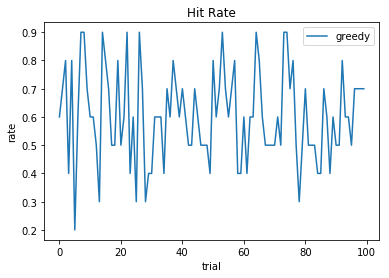

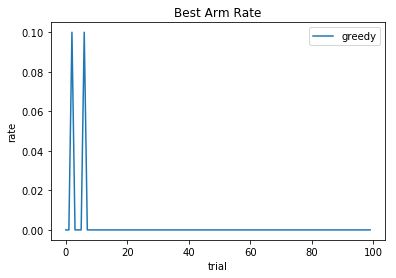

In [95]:
hit,best,reward=simulate(alg,outer_iter)
print(reward)
plot_rate([hit],N,["greedy"],"Hit Rate")
plot_rate([best],N,["greedy"],"Best Arm Rate")